<h1 style=  "color:mediumaquamarine; font-family:arial; font-weight:bolder">About the data</h1>
<h3 style=  "font-family:arial; font-weight:bold;">Context:</h3>
<p>While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.</p>

<h4 style=  "font-family:arial; font-weight:bold;">Content:</h4>
<p>Each app (row) has values for catergory, rating, size, and more.</p>

<h4 style=  "font-family:arial; font-weight:bold;">Acknowledgements:</h4>
<p>This information is scraped from the Google Play Store. This app information would not be available without it.<p>

<h4 style=  "font-family:arial; font-weight:bold;">About the file:</h4>
<p>details of the applications on Google Play. There are 13 features thstrong strong texttextat describe a given app.. Expilo. Ed<p>

### **`Credits`**
This dataset was downloaded from: [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

#### **`Author of Dataset:`** LAVANYA 

# Reason for analysis
The present study considers app performance metrics to identify user preferences and market trends in the context of apps. These include for instance; the use of ratings, installs, file size/ size on device and compatibility, the study intends to determine key factors that help to drive success for an app.

The primary goals include identifying the most highly ranked and frequently downloaded app categories, studying genre distribution, and identifying the correlation between app attributes and the trend of user interactions. Further, the research also seeks to examine the influence of both content ratings and app type among the users.

Finally, this comprehensive examinationvaims to offer exploitation that can be helpful for developers or marketers and help them make certain decisions regarding app design and, as a result, improving customers’ satisfaction.

# EDA on data (Google Playstore Apps)

## 1. Importing Libraries

In [76]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import ydata_profiling as yd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('../data/googleplaystore.csv')

## 2. Exploring and Cleaning the data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# dimensions of data
df.shape

(10841, 13)

In [5]:
# metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# summary through ydata_profiling
# uncomment and run if you want to see a quick summary of the data
# data_summary = yd.ProfileReport(df)
# data_summary.to_file('../output/data_summary.html')

In [7]:
# summary through skim
# uncomment and run if you want to see a quick summary of the data
# skim(df)

In [8]:
# Lets parse the type of data to the correct format
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

>Columns like 'Installs', 'Reviews', 'Size', and 'Price' contain numeric data, but their data type is currently set to `object`. To perform numerical operations effectively, we need to convert these columns to a `numeric` data type.

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Taking random samples to understand more about the columns to which I am to convert to the numeric format
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
594,FERZU - Furries Social Network,DATING,3.9,1576,Varies with device,"10,000+",Free,0,Mature 17+,Dating,"February 16, 2018",4.4.1,4.1 and up
6335,BJ card game blackjack,GAME,NaN,3,21M,500+,Free,0,Teen,Card,"December 2, 2016",1.0,2.3 and up
7284,CG Daily News,NEWS_AND_MAGAZINES,4.3,65,3.5M,"10,000+",Free,0,Everyone,News & Magazines,"April 29, 2018",8.2,4.0.3 and up
8762,Dr. Panda Town,FAMILY,4.0,36578,Varies with device,"1,000,000+",Free,0,Everyone,Education;Pretend Play,"August 3, 2018",Varies with device,Varies with device
8459,Video Downloader - for Instagram Repost App,VIDEO_PLAYERS,4.8,332623,4.6M,"10,000,000+",Free,0,Everyone,Video Players & Editors,"July 27, 2018",1.1.58,4.1 and up
7810,CamScanner (License),PRODUCTIVITY,4.4,26358,50k,"500,000+",Paid,$1.99,Everyone,Productivity,"January 17, 2014",1.7,2.0 and up
10446,Smart Wi-Fi Hotspot PRO,COMMUNICATION,3.7,197,957k,"10,000+",Paid,$2.99,Everyone,Communication,"February 10, 2016",1.0,2.2 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
2778,JackThreads: Men's Shopping,SHOPPING,4.0,13085,2.7M,"1,000,000+",Free,0,Teen,Shopping,"November 8, 2017",5.1,4.0.3 and up
8438,Pocket Heroes,FAMILY,4.5,96658,26M,"1,000,000+",Free,0,Everyone 10+,Role Playing,"September 5, 2015",2.0.5,3.0 and up


>It can be observed that columns like 'Installs', 'Price', and 'Size' contain special characters (such as $, +, etc.), which are associated with the data in these columns. To make the column names more descriptive, I will include these special characters in the corresponding column names and remove them from the values under those 
columns.

In [11]:
# Type conversion of Installs column
df['Installs'] = df['Installs'].str.replace('+','')
df.rename(columns = {'Installs' : 'Base_Installs'}, inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df['Base_Installs'] = df['Base_Installs'].str.replace(',','')
df['Base_Installs'] = df['Base_Installs'].astype(float)

ValueError: could not convert string to float: 'Free'

The above error indicates an anomaly in the Installs column, as 'Free' is not a valid value for Installs.

In [14]:
# Drop the the abnormal rows and then convert the Base_Installs column to integer 
df.drop(df[df['Base_Installs'] == 'Free'].index, inplace = True)
df['Base_Installs'] = df['Base_Installs'].astype(int)
df['Base_Installs'].dtype

dtype('int32')

In [15]:
# Lets repeat the same procedure for the Reviews column
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].all()

False

In [ ]:
# Since the reviews column had some values which were non-numeric like 'based on device',
# so we need to drop those rows

#df['Reviews'].dropna(inplace=True)

In [16]:
# Converting Price to float
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float).round(2)



In [17]:
# Converting Size to float
# If the size is in kb then divide by 1024 to convert it to MB
# Handle 'varies with device' rows

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            str_size = size.strip('k')
            return (float(str_size))/1024
        elif 'M' in size:
            str_size = size.strip('M')
            return float(str_size)
    else:
        return float(size)
    
df['Size'] = df['Size'].apply(convert_size)

In [18]:
df.rename(columns = {'Size': 'Size_MB'}, inplace = True)
df['Size_MB'] = df['Size_MB'].round(3)
df.sample(10)

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4390,Drag'n'Boom,GAME,4.8,133180,54.0,1000000,Free,0.0,Everyone 10+,Arcade,"January 12, 2018",1.1.1,4.4 and up
6172,Bg Radios - Bulgarian radio stations online,FAMILY,NaN,8,13.0,1000,Free,0.0,Everyone,Entertainment,"July 13, 2018",1.3.2,4.1 and up
1562,Dollhouse Decorating Games,LIFESTYLE,4.1,18968,32.0,5000000,Free,0.0,Teen,Lifestyle,"April 26, 2018",5.1,4.1 and up
10699,FO BOULANGER,FINANCE,NaN,10,19.0,50,Free,0.0,Everyone,Finance,"May 15, 2018",1.0,4.4 and up
4123,imo beta free calls and text,COMMUNICATION,4.3,659395,11.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
7601,Surely You Quest - Magiswords,FAMILY,4.6,43314,83.0,1000000,Free,0.0,Everyone 10+,Role Playing;Action & Adventure,"June 20, 2017",1.0.2,4.1 and up
3111,Hotels.com: Book Hotel Rooms & Find Vacation D...,TRAVEL_AND_LOCAL,4.5,260121,NaN,10000000,Free,0.0,Everyone,Travel & Local,"July 4, 2018",Varies with device,Varies with device
10686,Armed Cam Gun Pack,GAME,4.2,1012,50.0,10000,Free,0.0,Teen,Action,"January 18, 2015",1.0.2,3.0 and up
2550,Snapchat,SOCIAL,4.0,17014787,NaN,500000000,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
3607,"Amazon FreeTime – Kids’ Videos, Books, & TV shows",PARENTING,4.2,2715,24.0,500000,Free,0.0,Everyone,Parenting;Music & Video,"July 24, 2018",FreeTimeApp-aosp_v3.14_Build-1.0.204367.0.13014,5.0 and up


In [58]:
# Lets see if the conversion worked as intended
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size_MB           float64
Base_Installs       int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [59]:
df.describe()

,Rating,Reviews,Size_MB,Base_Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.589085,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## 3. Data Cleaning

## 3.1 Dealing with missing values

### 3.1.1 Observing the missing data

<Axes: >

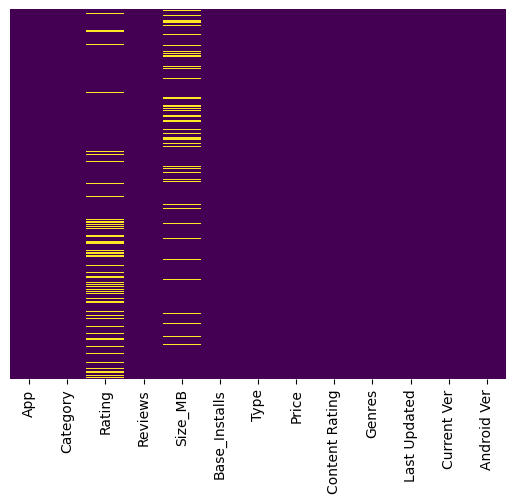

In [69]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

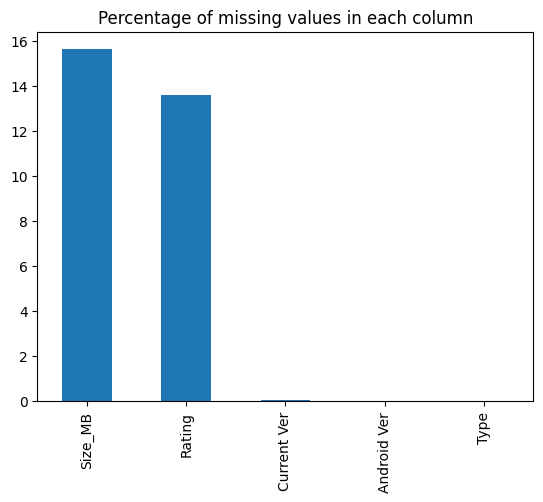

In [71]:
# Creating a bar plot for percentage of missing percentage in each column

missing = df.isna().sum().sort_values(ascending = False)
missing = missing[missing > 0]
missing = (missing/len(df))*100
missing.plot(kind = 'bar')
plt.title('Percentage of missing values in each column')
plt.show()


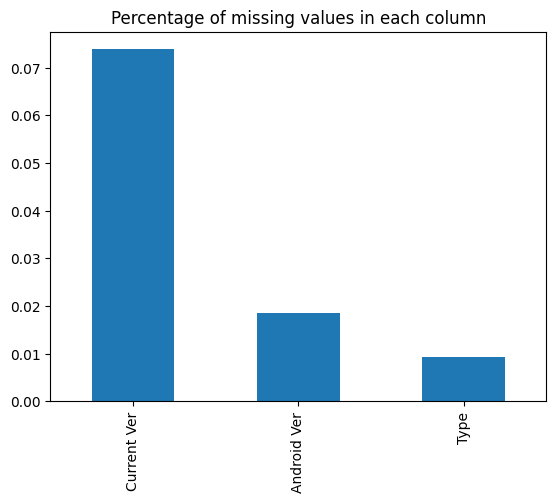

In [75]:
# Plotting the missing less than 1% values
missing = missing[missing < 1]
missing.plot(kind = 'bar')
plt.title('Percentage of missing values in each column')
plt.show()


In [108]:
# Total number of missing values in the data
print(f"Total missing values in the data: {df.isna().sum().sum()}")

Total missing values in the data: 3325


In [109]:
# Missing values distribution
df.isna().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_MB              1695
Base_Installs           0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Installs Category     145
dtype: int64

In [106]:
# Percentage of missing values by column
df.isna().sum()/len(df)*100

App                   0.000000
Category              0.000000
Rating               13.597786
Reviews               0.000000
Size_MB              15.636531
Base_Installs         0.000000
Type                  0.009225
Price                 0.000000
Content Rating        0.000000
Genres                0.000000
Last Updated          0.000000
Current Ver           0.073801
Android Ver           0.018450
Installs Category     1.337638
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size_MB         9145 non-null   float64
 5   Base_Installs   10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [85]:
# Lets see the correlation between the columns
corr_matrix = df[['Rating', 'Reviews', 'Size_MB', 'Base_Installs', 'Price']].corr()
corr_matrix

,Rating,Reviews,Size_MB,Base_Installs,Price
Rating,1.000000,0.068141,0.083737,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667
Size_MB,0.083737,0.238214,1.000000,0.164787,-0.023007
Base_Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000


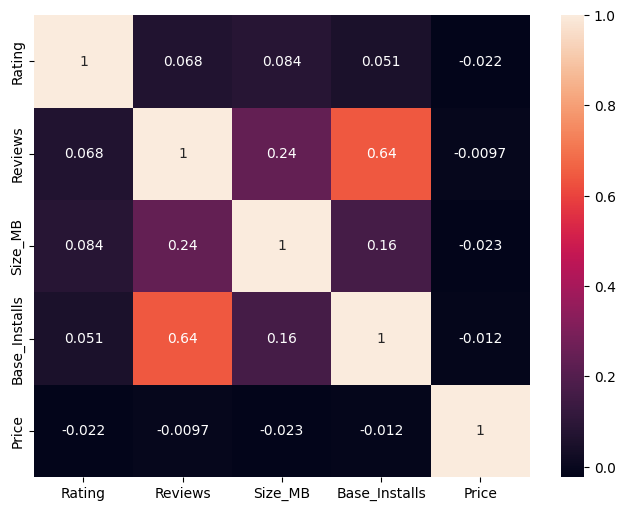

In [87]:
# Lets plot the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Observations
1. There are a total of <span style="color: yellow;">3325</span> missing values in the data.
2. There are <span style="color: yellow;">1474</span> missing values in the <span style="color: yellow;">'Rating'</span> column and more than <span style="color: yellow;">1600</span> missing values in the <span style="color: yellow;">'Size'</span> column.
3. The <span style="color: yellow;">'Type'</span>, <span style="color: yellow;">'Current Version'</span>, and <span style="color: yellow;">'Android Version'</span> columns have <span style="color: yellow;">1</span>, <span style="color: yellow;">8</span>, and <span style="color: yellow;">145</span> missing values, respectively.


### Approach
So, the 'Rating' and 'Size' columns are responsible for the majority of the missing values in the data, while the other columns have less than 2% missing values, which can be simply neglected.

- I will simply drop the missing rows in columns with approx `1% or less` missing values.
- For the `Rating` and `Size` columns further investigation is required to understand the 
  significance of the missing values and how to deal with them

### 3.1.2 Some required feature engineering

In [111]:
# I can create a column to categorize the no of Installs so that we can measure its impact on the Rating

bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
labels = ['very-low', 'low', 'moderately-low', 'moderate', 'moderately-high', 'high', 'very-high', 'extremely-high', 'massive']
df['Installs Category'] = pd.cut(df['Base_Installs'], bins=bins, labels=labels)

In [96]:
df.head(3)

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,very-low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high


In [98]:
df.groupby('Installs Category').agg({
    'Rating' : 'describe'
})

Rating                                               
                    count      mean       std  min    25%  50%  75%  max
Installs Category                                                       
very-low           2802.0  4.114632  0.729243  1.0  3.800  4.3  4.6  5.0
low                 467.0  4.051178  0.551017  1.6  3.800  4.2  4.4  4.9
moderately-low     1150.0  4.110261  0.484969  1.6  3.900  4.2  4.5  4.9
moderate            538.0  4.168216  0.446185  1.8  3.925  4.3  4.5  4.9
moderately-high    1577.0  4.220862  0.348605  2.2  4.000  4.3  4.5  4.9
high                752.0  4.243218  0.317626  2.0  4.100  4.3  4.5  4.9
very-high          1252.0  4.313419  0.277183  3.0  4.200  4.4  4.5  4.9
extremely-high      289.0  4.351211  0.223312  3.1  4.200  4.4  4.5  4.8
massive             409.0  4.411491  0.163719  3.5  4.300  4.4  4.5  4.8

<Axes: xlabel='Installs Category', ylabel='Rating'>

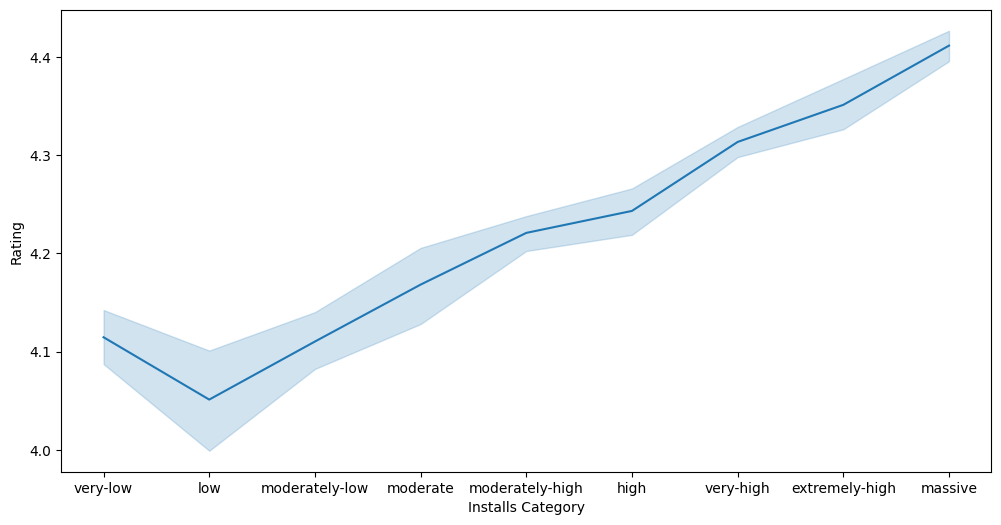

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Installs Category', y='Rating')

<Axes: xlabel='Installs Category', ylabel='Rating'>

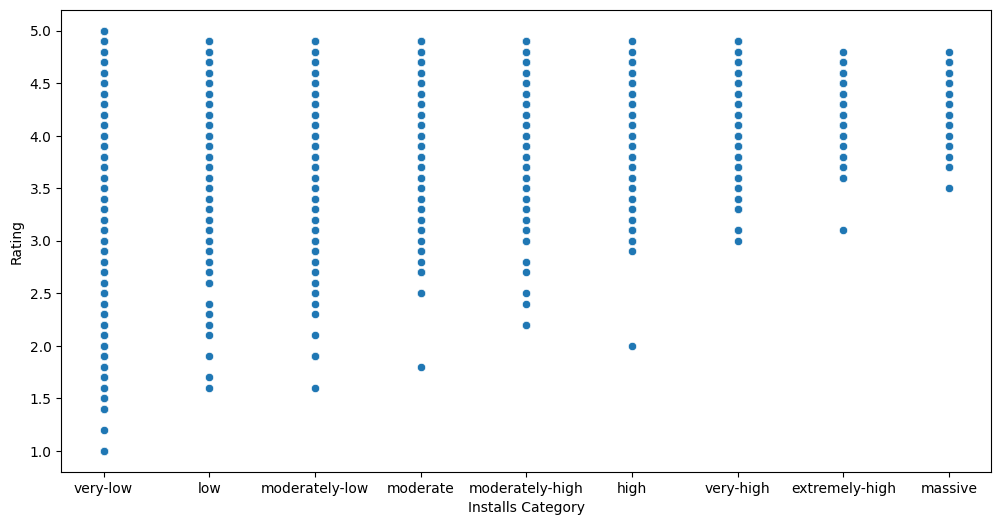

In [113]:
# Lets create a scatter plot as well

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Installs Category', y='Rating')

In [156]:
df.groupby('Category').agg({
    'Size_MB' : 'mean'
}).sort_values('Size_MB', ascending=False)

,Size_MB
Category,
GAME,44.370065
FAMILY,28.319023
TRAVEL_AND_LOCAL,24.654464
SPORTS,24.338823
HEALTH_AND_FITNESS,22.768856
PARENTING,22.512963
FOOD_AND_DRINK,22.185000
ENTERTAINMENT,21.853333
EDUCATION,20.790604


In [168]:
# Lets see the distribution of size by category
df.sort_values('Size_MB', ascending=False).groupby('Category')['Size_MB'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
GAME,1015.0,44.370065,27.741645,0.113,22.00000,40.00,63.00,100.0
FAMILY,1832.0,28.319023,26.260831,0.014,6.50000,20.00,44.00,100.0
TRAVEL_AND_LOCAL,192.0,24.654464,20.220062,0.018,9.95000,19.00,33.00,90.0
SPORTS,311.0,24.338823,21.830744,0.321,7.05000,20.00,31.50,100.0
HEALTH_AND_FITNESS,264.0,22.768856,22.198210,0.221,6.50000,13.00,35.50,100.0
PARENTING,54.0,22.512963,25.591317,1.500,5.27500,11.00,27.75,98.0
FOOD_AND_DRINK,100.0,22.185000,15.260680,1.700,12.00000,17.50,30.75,76.0
ENTERTAINMENT,90.0,21.853333,15.921078,3.300,12.00000,19.00,23.75,78.0
EDUCATION,111.0,20.790604,19.891160,0.514,6.75000,18.00,23.00,97.0


In [182]:
sp.stats.skew(df['Size_MB'].dropna().drop_duplicates()).round(3)

2.201

A high skewness in Size of apps is seen, so I will not use mean to impute the missing values in size.
Instead I can impute the missing values with median Size which is less likely to be affected by skewness.

### Some points to notice
- While categories like GAME, FAMILY, SPORTS... have a high average size, they also have a higher std value
  indicating that a they have a mix of lightweight and heavyweight apps.
- The analysis revealed a high skewness value of 2.2 in the app size distribution, indicating a significant
  positive skew.
- The majority of apps have smaller sizes, while a few outliers may significantly impact the mean.


In [169]:
# Lets see the number of apps in each category
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

### Key Observations
#### In Rating
##### Rating trends with Installs:
- It can be observed that the apps with more Installs have a higher mean rating.
- `Low` categories see a wide range of ratings from 1 all the way to 5.

##### Distribution insights:
- The scatter plot suggests that many apps in lower install categories have a range of ratings and
  there are fewer apps with low ratings in higher install categories which may have something to do 
  the category of the apps.
- The rating of apps with high number of installs clusters around higher values.

##### Thoughts:
          Combining the above analysis suggests thatimputing missing values with the mean ratings based 
          on install categories is a reasonable and effective strategy. However, before that I should 
          check the affect of app category on average ratings.

         


---
### Key Observations
#### In App Size
##### Skewness in App Size:
- The analysis revealed a **high skewness value of 2.2** in the app size distribution, indicating a significant positive skew.
- This suggests that a small number of apps have much larger sizes, impacting the overall distribution.

##### Distribution Insights:
- Visualizations (histograms and bell curves) may mean presence of outliers and highlighted the non-normality of the app size distribution.
- The majority of apps have smaller sizes, while a few outliers significantly increase the mean.

##### Imputation Strategy:
- Given the high skewness, using the **mean** for imputing missing values would result in biasness.
- Instead, **median imputation** would be better in this case.



In [120]:
# Lets see the top 10 app categories with the highest ratings
df.groupby('Category').agg({
    'Rating' : 'mean'
}).sort_values('Rating', ascending=False).head(10)

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


In [122]:
# Now lets see the top 10 app categories with the highest number of installs

df.groupby('Category').agg({
    'Base_Installs' : 'sum'
}).sort_values('Base_Installs', ascending=False).head(10)

,Base_Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


---
The type of apps that are installed by more users are likely to have a higher mean rating,
in simple words popular apps are high rated.
This may mean that people tend to install applications that are high rated.

### 3.1.3 Imputing missing values in Rating and Size

In [144]:
# Now lets fill the missing values rating column with the mean rating by app category

df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'), inplace=True)

In [188]:
df.head(5)

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,very-low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,extremely-high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,moderately-low


In [183]:
# Also fill the missing values of Size column with the median Size by app category

df['Size_MB'].fillna(df.groupby('Category')['Size_MB'].transform('median'), inplace=True)

In [185]:
df.isna().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size_MB                0
Base_Installs          0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
Installs Category    145
dtype: int64

In [186]:
# For the rest of the columns, the missing values are not significant. Lets drop them

df.dropna(inplace=True)

In [187]:
# Final check for missing values
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_MB              0
Base_Installs        0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Installs Category    0
dtype: int64

---
The data is now clean of missing values.

#### 3.2 Removing duplicate row

In [189]:
# Lets review the duplicate rows
df.duplicated().sum()

463

In [190]:
df.duplicated().value_counts()

False    10222
True       463
Name: count, dtype: int64

In [193]:
# Lets see some duplicate row to see if they are really duplicates
df.loc[df.duplicated(keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,moderate
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,moderate
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,moderately-high
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,moderately-high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,very-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34.0,10000000,Free,0.00,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,very-high
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34.0,10000000,Free,0.00,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,very-high
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,19.0,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,extremely-high
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,19.0,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,extremely-high


In [194]:
# Since there are 463 duplicate rows and they are really duplicates, lets drop them
df.drop_duplicates(inplace=True)

In [195]:
print(f"Total rows in the data: {len(df)}")
print(f"Total missing values in the data: {df.isna().sum().sum()}")
print(f"Total duplicate values in the data: {df.duplicated().sum()}")

Total rows in the data: 10222
Total missing values in the data: 0
Total duplicate values in the data: 0


--- 
The data is now cleaned of duplicate row

# 4. Insights from data

In [196]:
df.sample(5)

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category
1296,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,4.600000,115721,67.0,10000000,Free,0.0,Everyone,Health & Fitness,"July 11, 2018",3.5.0,5.0 and up,very-high
4389,N-Com Wizard,COMMUNICATION,3.300000,960,3.8,50000,Free,0.0,Everyone,Communication,"September 21, 2017",2.1.2,2.3.3 and up,low
8009,CW Mobile,FAMILY,4.192272,3,22.0,50,Free,0.0,Everyone,Education,"June 25, 2018",3.3.99,4.2 and up,very-low
8370,Go Go Coupons - Free Coupon and Discount,SHOPPING,3.000000,4,1.2,1000,Free,0.0,Everyone,Shopping,"July 1, 2018",10.0,4.0 and up,very-low
3306,Calculator ++,TOOLS,4.600000,33509,3.6,1000000,Free,0.0,Everyone,Tools,"May 12, 2018",2.2.7,4.4 and up,moderately-high


In [197]:
# Lets see some questions that we can answer with this data
# 1. What are the top 10 app categories with the highest ratings?
# 2. What are the top 10 app categories with the highest number of installs?
# 3. What gneres are the most popular?
# 4. Are apps with lower sizes more likely to be installed?
# 5. Are apps with higher ratings more likely to be installed?
# 6. Do people install apps with more reviews or high rating?
# 7. Do the apps that work on old android versions have more installs?
# 8. Are paid apps more likely to have higher ratings?
# 9. What is the most trending app available for everyone?
# 10. What is the impact of Content rating on installs?

In [203]:
pd.options.display.max_rows = None

In [225]:
# 1. What are the top 10 app categories with the highest ratings?

df[['Category','Rating']].sort_values('Rating', ascending=False, ignore_index=True).drop_duplicates().head(10)

,Category,Rating
0,PARENTING,5.0
1,FAMILY,5.0
2,TOOLS,5.0
4,LIFESTYLE,5.0
5,SOCIAL,5.0
6,COMMUNICATION,5.0
8,PHOTOGRAPHY,5.0
10,ART_AND_DESIGN,5.0
11,SHOPPING,5.0
12,PERSONALIZATION,5.0


In [226]:
# By mean
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.376446
EDUCATION              4.376069
BOOKS_AND_REFERENCE    4.349103
PERSONALIZATION        4.333691
PARENTING              4.300000
GAME                   4.279544
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.263582
SOCIAL                 4.257322
Name: Rating, dtype: float64

In [227]:
# 2 . What are the top 10 app categories with the highest number of installs?
print(df.groupby('Category')['Base_Installs'].sum().sort_values(ascending=False).head(10))

Category
GAME               19544024415
FAMILY              7541632405
PHOTOGRAPHY         5721247655
TOOLS               4952271905
COMMUNICATION       4652276251
PRODUCTIVITY        4463091369
SHOPPING            2573348785
SOCIAL              2513867902
PERSONALIZATION     2074483782
VIDEO_PLAYERS       1722002720
Name: Base_Installs, dtype: int64


In [231]:
# 3. What gneres are the most popular? 
# For developers, what are the most popular genres?
print(df.groupby('Genres')['App'].count().sort_values(ascending=False).head(10))

Genres
Tools              829
Entertainment      585
Education          524
Business           426
Medical            407
Productivity       393
Personalization    385
Lifestyle          371
Sports             364
Finance            358
Name: App, dtype: int64


In [232]:
# For users, what are the most popular genres?
print(df.groupby('Genres')['Base_Installs'].sum().sort_values(ascending=False).head(10))

Genres
Action           5836039190
Photography      5721247655
Tools            4942271905
Arcade           4717129155
Communication    4652276251
Productivity     4463091369
Entertainment    2680704684
Casual           2662830740
Shopping         2573348785
Sports           2544574498
Name: Base_Installs, dtype: int64


In [234]:
# 4. Are apps with lower sizes more likely to be installed?
# First lets see what is the mean size of the apps

mean_size = df['Size_MB'].mean().round(3)
print(f"The mean size of apps on the playstore is {mean_size}")

The mean size of apps on the playstore is 20.206


In [241]:
# Now lets see if apps with size lower than mean are installed more or not

print(f"Percentage of app Installs with size lower than mean is {(df.loc[df['Size_MB'] < mean_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")
print(f"Percentage of app Installs with size more than mean is {(df.loc[df['Size_MB'] > mean_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")

Percentage of app Installs with size lower than mean is 53.83680213984407%
Percentage of app Installs with size more than mean is 46.16319786015593%


In [262]:
df.loc[df['Size_MB'] < mean_size , 'Base_Installs'].sum()

36140826931

In [263]:
df.loc[df['Size_MB'] > mean_size , 'Base_Installs'].sum()

30989510486

Apps with lower size are 7% more likely to be installed than those with higher sizes.

In [255]:
# Now lets see the difference in installs for 25th and 75th percentiles
q1_size = df['Size_MB'].quantile(0.25)
q2_size = df['Size_MB'].quantile(0.5)
q3_size = df['Size_MB'].quantile(0.75)

In [256]:

print(f"Percentage of app Installs with size less than q1 {(df.loc[df['Size_MB'] <= q1_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")
print(f"Percentage of app Installs with size less than q2 {(df.loc[df['Size_MB'] <= q2_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")
print(f"Percentage of app Installs with size more than q2 {(df.loc[df['Size_MB'] >= q2_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")
print(f"Percentage of app Installs with size more than q3 {(df.loc[df['Size_MB'] >= q3_size , 'Base_Installs'].sum())/(df['Base_Installs'].sum())*100}%")

Percentage of app Installs with size less than q1 6.958550660907369%
Percentage of app Installs with size less than q2 37.705267066913486%
Percentage of app Installs with size more than q2 64.14546359794592%
Percentage of app Installs with size more than q3 42.13938950623582%


In [264]:

print(f"Installs with size less than q1 {(df.loc[df['Size_MB'] <= q1_size , 'Base_Installs'].sum())}")
print(f"Installs with size less than q2 {(df.loc[df['Size_MB'] <= q2_size , 'Base_Installs'].sum())}")
print(f"Installs with size more than q2 {(df.loc[df['Size_MB'] >= q2_size , 'Base_Installs'].sum())}")
print(f"Installs with size more than q3 {(df.loc[df['Size_MB'] >= q3_size , 'Base_Installs'].sum())}")

Installs with size less than q1 4671298538
Installs with size less than q2 25311673006
Installs with size more than q2 43061066151
Installs with size more than q3 28288314361


<Axes: title={'center': 'Line plot between App Size and Installs'}, xlabel='Size_MB', ylabel='Base_Installs'>

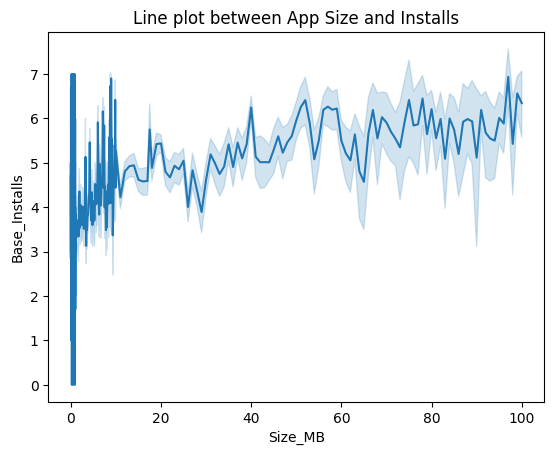

In [258]:
plt.title('Line plot between App Size and Installs')
sns.lineplot(x='Size_MB', y=np.log10(df['Base_Installs']), data=df)


<Axes: title={'center': 'Line plot between App Size and Installs'}, xlabel='Size_MB', ylabel='Installs Category'>

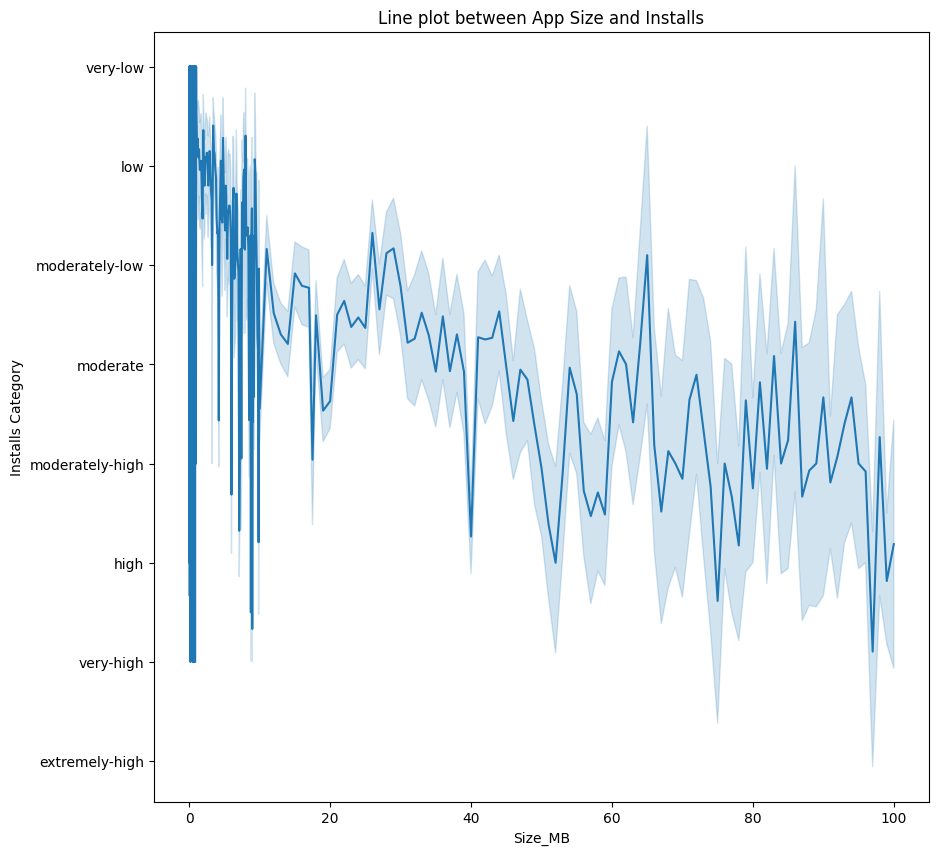

In [265]:
plt.figure(figsize=(10, 10))
plt.title('Line plot between App Size and Installs')
sns.lineplot(x='Size_MB', y= 'Installs Category', data=df)

Text(0, 0.5, 'Installs')

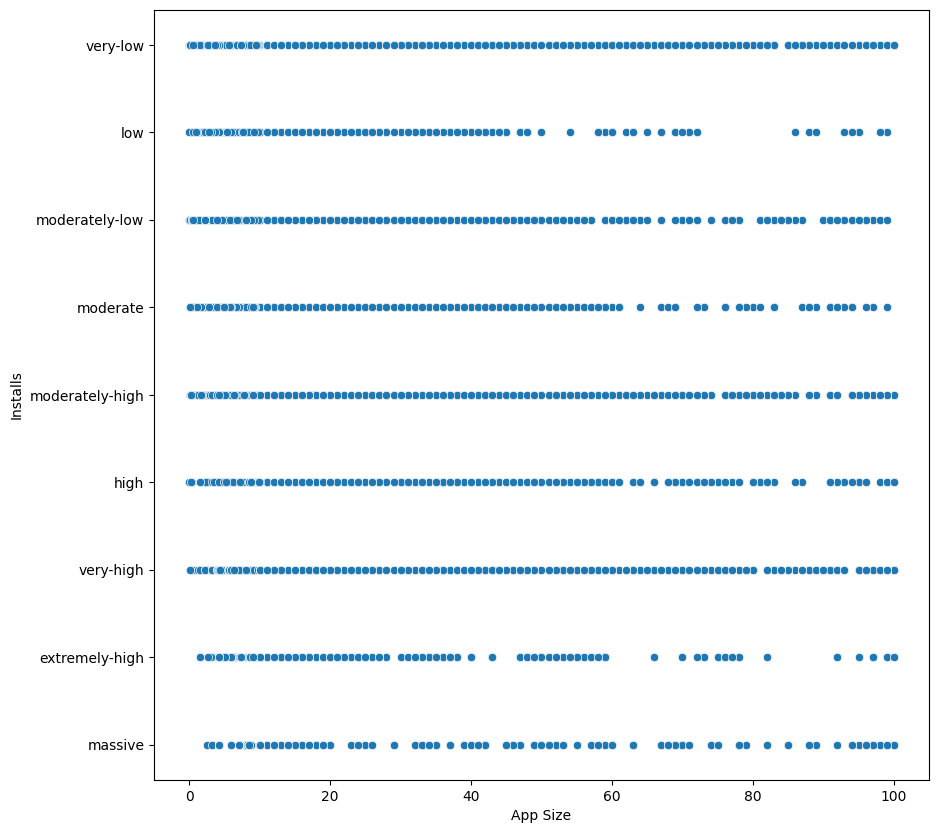

In [260]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Size_MB', y='Installs Category', data=df)
plt.xlabel('App Size')
plt.ylabel('Installs')

### Some observations: 
Install trends: 
1. From the analysis above, while it can be  observed that some people tend to install apps having larger sizes,
apps with smaller sizes continue to attract users attention.
2. This may indicate that some people choose applications based on more features and a rich experience, while others consider smaller and size optimised apps. 
3. There can be a possibility that larger apps may be are more feature rich for the user and smaller apps are more optimised.
4. There is significant spike in near 0 Mb mark, this can indicate anomalies in data 
or an app which is very small in size but very popular.

#### Next Step: 
We can now look into the Ratings recieved by app sizes to better understand the install trends.

In [279]:
# 5. Are apps with higher ratings more likely to be installed?

# I will analyze Reviews too along with Rating
# First lets check the correlation between Rating, Base_Installs and Reviews
df[['Rating', 'Base_Installs', 'Reviews']].corr()


,Rating,Base_Installs,Reviews
Rating,1.000000,0.121630,0.103618
Base_Installs,0.121630,1.000000,0.647981
Reviews,0.103618,0.647981,1.000000


In [286]:
df.groupby('Installs Category').agg({
    'Rating': 'mean',
    'Reviews': lambda x: np.log10(x.mean())  # Apply log10 only to Reviews
})

,Rating,Reviews
Installs Category,,
very-low,4.135891,2.030353
low,4.054313,2.993826
moderately-low,4.115294,3.531966
moderate,4.173214,3.995297
moderately-high,4.218625,4.519935
high,4.239385,5.014112
very-high,4.313604,5.566698
extremely-high,4.348529,6.097008
massive,4.408401,6.670781


<Axes: xlabel='Rating', ylabel='Installs Category'>

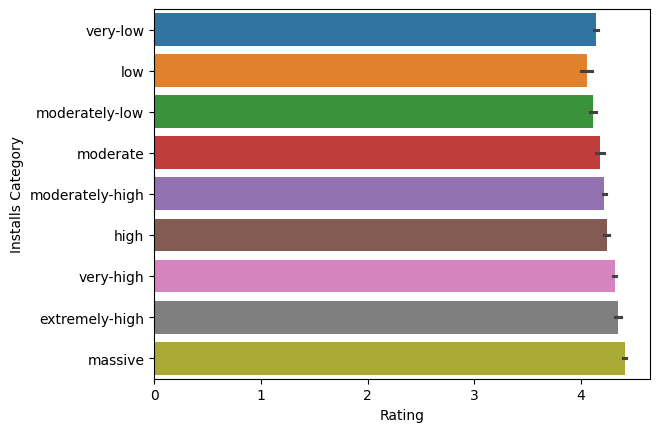

In [299]:
sns.barplot(x='Rating', y='Installs Category', data=df, hue='Installs Category')

<Axes: xlabel='Installs Category', ylabel='Reviews'>

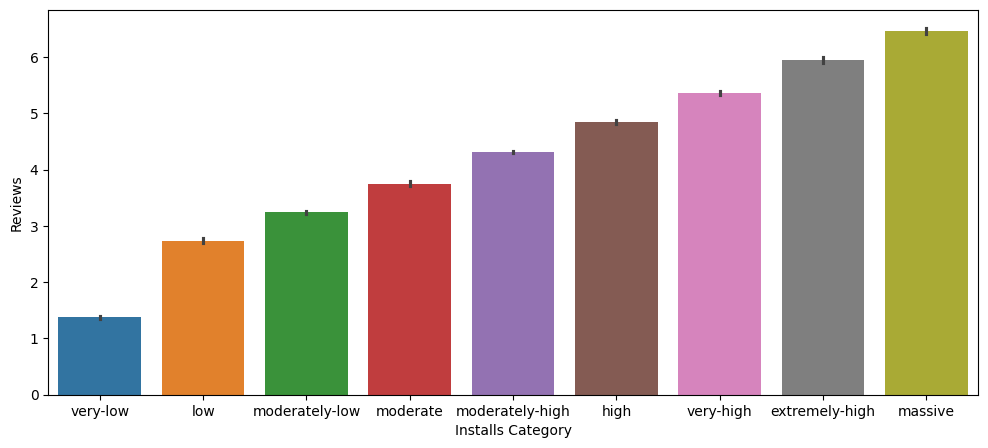

In [293]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Installs Category', y=np.log10(df['Reviews']), data=df, hue='Installs Category')

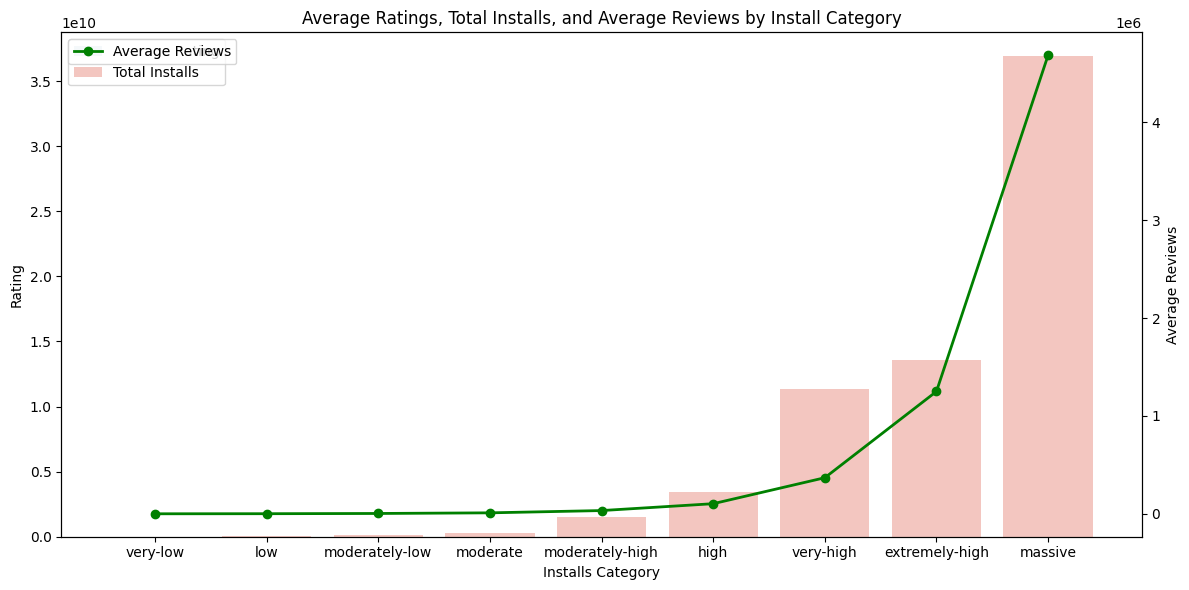

In [303]:
# Assuming df is your original DataFrame
# Create a new DataFrame for the plot
plot_data = df.groupby('Installs Category').agg({
    'Rating': 'mean',
    'Reviews': 'mean',
    'Base_Installs': 'sum'  # Assuming this column exists
}).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create bar plots for Ratings and Base Installs
sns.barplot(x=plot_data['Installs Category'], y=plot_data['Rating'], color='lightblue', label='Average Rating', alpha=0.7)
sns.barplot(x=plot_data['Installs Category'], y=plot_data['Base_Installs'], color='salmon', label='Total Installs', alpha=0.5)

# Create a twin y-axis for the Reviews line plot
ax2 = plt.gca().twinx()
ax2.plot(plot_data['Installs Category'], plot_data['Reviews'], color='green', marker='o', label='Average Reviews', linewidth=2)

# Add titles and labels
plt.title('Average Ratings, Total Installs, and Average Reviews by Install Category')
plt.xlabel('Install Category')
plt.ylabel('Rating / Installs')
ax2.set_ylabel('Average Reviews')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Key Observations

It can be clearly seen from the graphs above that:

1. **Correlation Between Installs and Reviews:**
   - Apps with a higher number of installs tend to receive more reviews. This pattern suggests that as an app becomes more widely used, more users feel motivated to share their feedback.

2. **Impact of Ratings on Installs:**
   - There is a noticeable trend where higher app ratings lead to an increase in installs. This indicates that users are more likely to download apps that are rated highly, reflecting their trust and satisfaction.

3. **Popularity and User Engagement:**
   - Popular apps, characterized by higher install counts, also exhibit more reviews and higher average ratings. This observation suggests a weak positive correlation between reviews and ratings, indicating that greater user engagement is associated with better perceived app quality.

These insights underscore the significance of ratings in influencing app installs and the subsequent user engagement through reviews.

In [275]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,very-low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,extremely-high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,moderately-low


In [ ]:
# 6. Do people install apps with more reviews or high rating?

In [306]:
# We have donw about enough work already in Q.5 to answer this question
# Yet I'll a correlation matrix here
df[['Base_Installs', 'Rating', 'Reviews']].corr()

,Base_Installs,Rating,Reviews
Base_Installs,1.000000,0.121630,0.647981
Rating,0.121630,1.000000,0.103618
Reviews,0.647981,0.103618,1.000000


Based on my findings, it appears that users are more inclined to install apps that either have a high rating or a significant number of reviews.

#### This is how:
**Correlation Analysis:**
The correlation matrix shows a positive correlation between both: a) Installs and Ratings b) Installs and Reviews,
however, the value of corrrelation between Installs and Reviews is higher (0.6) as opposed to Ratings and Installs(0.12), but, this does not mean that more reviews alone is the reason for app popularity and more installs, instead it is that people install applications that have a higher number of positive user feedbacks.
Overall, as Reviews are a considerable factor for more installs, rating is also a considerable factor as installs are seen to rise with a rise in rating.

In [331]:
# 7. Do the apps that work on old android versions have more installs?

# Type casting is needed for android version
# Since the Android Ver column has some values which are not numeric, we'll convert them to NaN
df['Min Android Ver'] =  df['Android Ver'].apply(lambda x: np.nan if x[0].isalpha() else int(x[0]))

In [333]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Base_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Category,Min Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,very-low,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,moderate,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,extremely-high,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,moderately-low,4.0


In [334]:
# Lets see the correlation between installs and old android version

df[['Base_Installs', 'Min Android Ver']].corr()

,Base_Installs,Min Android Ver
Base_Installs,1.000000,0.043407
Min Android Ver,0.043407,1.000000


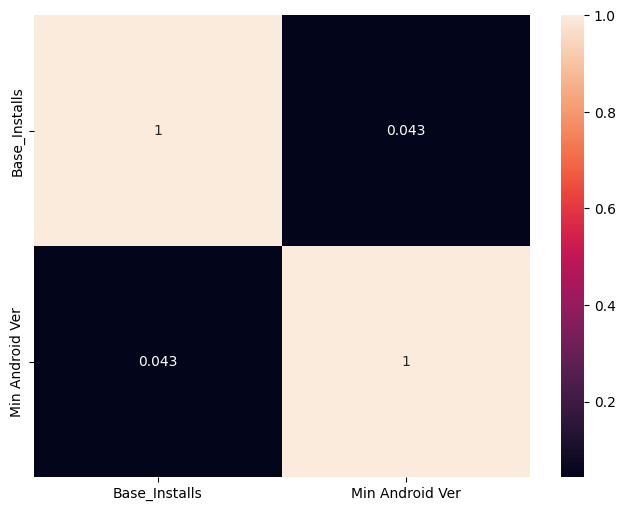

In [336]:
# Heatmap of the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Base_Installs', 'Min Android Ver']].corr(), annot=True)
plt.show()

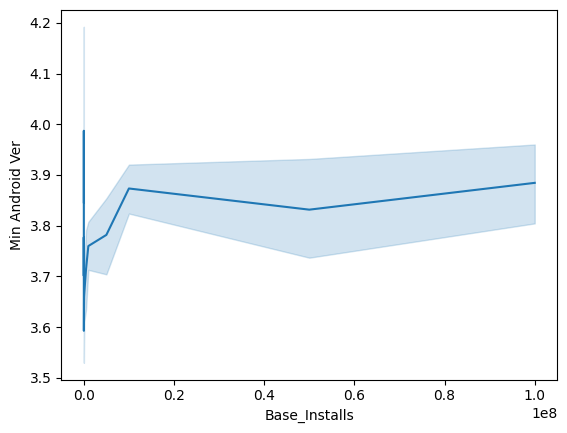

In [339]:
# line plot between installs and android version
sns.lineplot(x='Base_Installs', y=df['Min Android Ver'].dropna(), data=df)
plt.show()

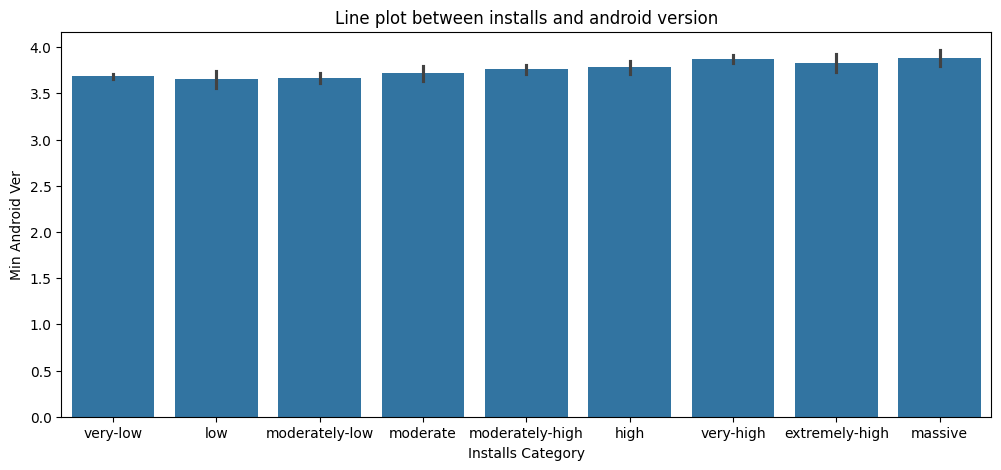

In [344]:
plt.figure(figsize=(12, 5))
plt.title('Line plot between installs and android version')
sns.barplot(x='Installs Category', y=df['Min Android Ver'].dropna(), data=df)
plt.show()

**Findings:** So, as per the above analysis, there is no link between android version and installs.

In [345]:
# 8. Are paid apps more likely to have higher ratings?
print(df.groupby('Type')['Rating'].mean())

Type
Free    4.180530
Paid    4.252865
Name: Rating, dtype: float64


In [346]:
print(df.groupby('Type')['Rating'].describe())

       count      mean       std  min       25%       50%  75%  max
Type                                                               
Free  9470.0  4.180530  0.485975  1.0  4.047411  4.223511  4.5  5.0
Paid   752.0  4.252865  0.504771  1.0  4.118412  4.300000  4.6  5.0


Both paid and Free apps are rated almost identically.

<Axes: xlabel='Type', ylabel='Rating'>

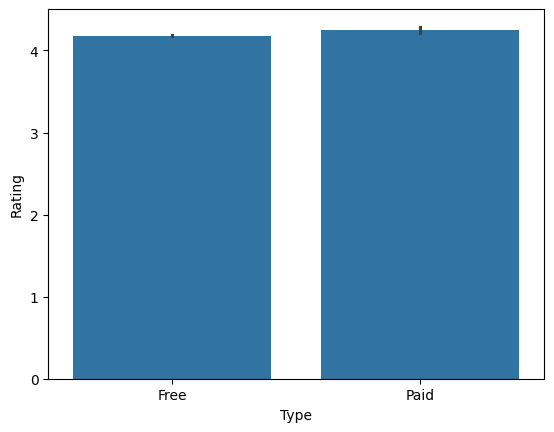

In [347]:
sns.barplot(x= 'Type', y= 'Rating', data=df)

In [372]:
# 9. What is the most trending app available for everyone?
# Let's see the top 10 trending apps

df[df['Content Rating'] == 'Everyone 10+'] \
    .sort_values('Base_Installs', ascending=False) \
    [['App', 'Base_Installs']] \
    .drop_duplicates(subset='App').head(10)


,App,Base_Installs
2206,ROBLOX,100000000
1660,Clash Royale,100000000
1666,Plants vs. Zombies FREE,100000000
1685,Zombie Tsunami,100000000
4249,Jetpack Joyride,100000000
1694,Minion Rush: Despicable Me Official Game,100000000
3916,Lep's World 2 🍀🍀,100000000
1879,Clash of Clans,100000000
1932,Shadow Fight 2,100000000
4247,Talking Tom Cat,100000000


In [379]:
df[['App', 'Category', 'Base_Installs']].sort_values('Base_Installs', ascending=False).head(10)

,App,Category,Base_Installs
2849,YouCam Perfect - Selfie Photo Editor,PHOTOGRAPHY,100000000
1703,8 Ball Pool,GAME,100000000
370,Telegram,COMMUNICATION,100000000
369,Android Messages,COMMUNICATION,100000000
3913,PAC-MAN,GAME,100000000
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,100000000
365,WeChat,COMMUNICATION,100000000
363,Who,COMMUNICATION,100000000
1710,My Talking Angela,GAME,100000000
1709,Score! Hero,GAME,100000000


In [381]:
df[df['Content Rating'] == 'Everyone 10+'] \
    .groupby('Category')['Base_Installs'].sum() \
    .sort_values(ascending=False) \
    .head(10)

Category
GAME                   3229860050
FAMILY                 1676904075
NEWS_AND_MAGAZINES      106957100
SPORTS                   65561000
EDUCATION                32000000
BOOKS_AND_REFERENCE      21110000
PERSONALIZATION          12510000
ENTERTAINMENT            11000000
LIFESTYLE                10201000
VIDEO_PLAYERS            10100000
Name: Base_Installs, dtype: int64

### Key Observation

In analyzing the app data, it was observed that several apps with 'Everyone 10+' content rating share identical download figures. So instead of ranking the apps as per downloads, I found the most popular app categories with
content rating 'Everyone 10+'.

1. **Trending Categories**: GAME and FAMILY are the categories that are available for everyone to download and are the top tredning categories in this segment of content rating.

3. **Targeted Audience Engagement**: Apps like games are developed for a very broad audience and can be installed by everyone hence having a lot more downloads compared to other categories.


<Axes: xlabel='Content Rating', ylabel='Installs Category'>

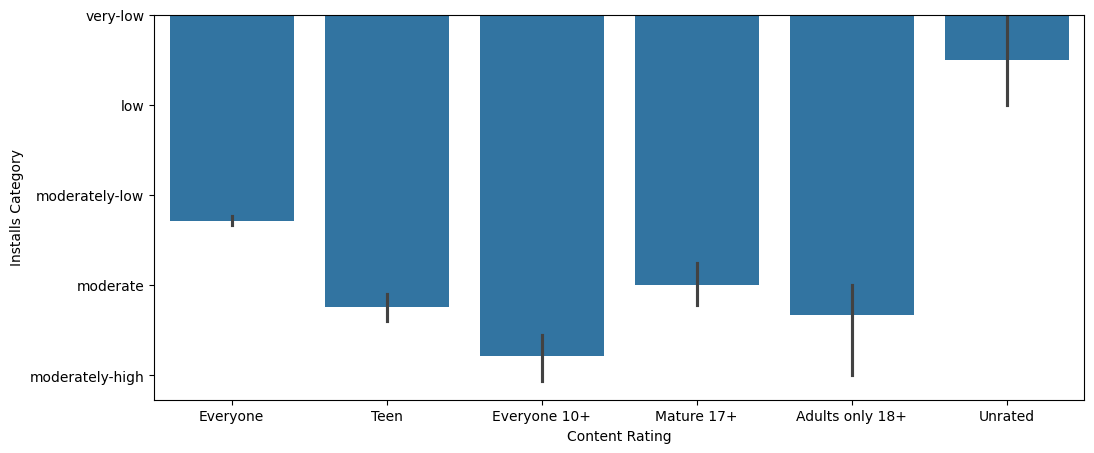

In [366]:
# 10. What is the impact of Content rating on installs?
plt.figure(figsize=(12, 5))
sns.barplot(x='Content Rating', y='Installs Category', data=df)

<Axes: title={'center': 'Scatter plot between installs and content rating'}, xlabel='Content Rating', ylabel='Installs Category'>

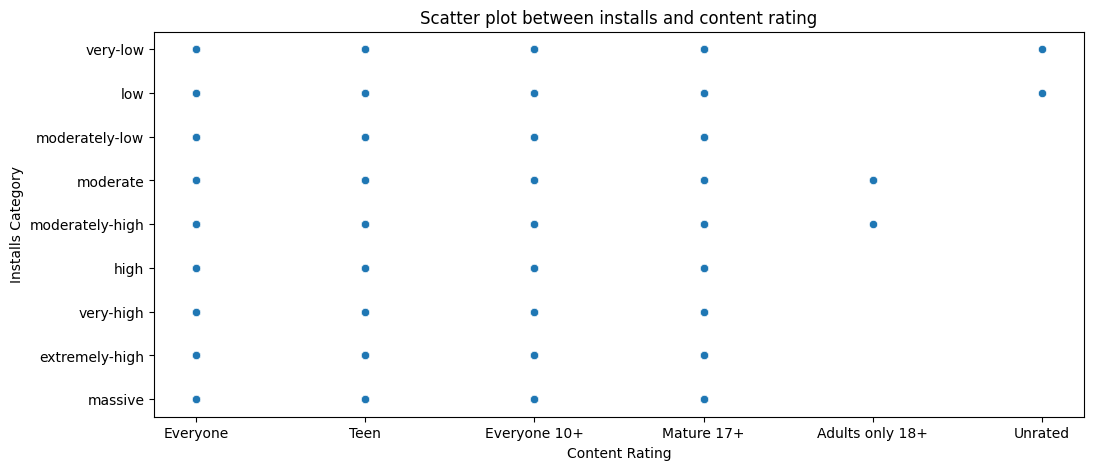

In [369]:
plt.figure(figsize=(12, 5))
plt.title('Scatter plot between installs and content rating')
sns.scatterplot(x='Content Rating', y='Installs Category', data=df)

### Insights on App Popularity and Install Patterns Across Content Ratings
- Distinct clusters observed across content ratings, indicating diverse app popularity.
- Significant number of apps with high and very high installs in "Everyone" and "Teen" ratings.
- Healthy interest in "Everyone 10+" and "Mature 17+" ratings, suggesting balanced appeal.
- Fewer apps in "Adults only 18+" category may indicate lower visibility or appeal.
- "Unrated" category shows a mix of install counts, indicating broad user appeal despite lack of specific ratings.
- Opportunities for developers to target high-demand categories and explore niches in lower install categories.